## Imports

In [18]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

## 1. Simulate the dynamics of cat qubits at the effective Hamiltonian level.

In Tutorial 1, we have introduced that we can dissipatively stabilize a cat qubit by coupling a memory mode  that will store our cat qubit to a lossy buffer mode with a specific interaction that exchanges two photons of the memory mode with one photon in the buffer mode.

For this, consider the Lindblad master equation:

$$\frac{d \hat{\rho}}{dt} = \mathcal{L}[\hat{\rho}] = -i \left[\hat{H}, \hat{\rho}\right] + \kappa_b \mathcal{D}(\hat{b})[\hat{\rho}]$$

The Hamiltonian of the system is given by
```math
\begin{aligned}
\hat{H} &= \hat{H}_{\mathrm{2ph}} + \hat{H}_d,\qquad \mathrm{with}\\
\hat{H}_{\mathrm{2ph}} &= g_2 {{}\hat{a}^\dagger}^2 \hat{b} + g_2^* \hat{a}^2 \hat{b}^\dagger,\\
\hat{H}_d &= \epsilon_d^* \hat{b} + \epsilon_d \hat{b}^\dagger.
\end{aligned}
```

Here, $\hat{H}_{\mathrm{2ph}}$ is the two-photon exchange Hamiltonian and $\hat{H}_d$ is the buffer drive Hamiltonian.

**Task 1.1: Getting started with `dynamiqs`**

Using `dynamiqs`, simulate the time-evolution of this system with the following parameters:

```math
\begin{aligned}
g_2 = 1.0, 
\epsilon_d = -4, 
\kappa_b = 10
\end{aligned}
```

(For now, we pretend that the parameters are without dimensions)

Use an initial state $\lvert \psi_0 \rangle$ in which both the buffer and the memory are in the vacuum. Use a Hilbert-space truncation of $n_a = 20$ and $n_b = 5$ (number of Fock-states in mode a and mode b, respectively) to begin with. You can play with a different Hilbert-space truncation.

Simulate the dynamics for a time $T=4$. 

Plot the wigner function of mode a (as a GIF or as a mosaic plot).

Also plot the expectation value of the number of photons, as well as the photon number parity in the memory mode.

In [20]:
# Define parameters
g2 = 1.0
epsilon_d = -4
kappa_b = 10
kappa_2 = 4 * (jnp.abs(g2)**2) / kappa_b # Unused
T = 4.0  # Simulation time
na = 20  # Hilbert space truncation for memory mode
nb = 5   # Hilbert space truncation for buffer mode

# Define annihilation operators correctly for both modes
a = dq.tensor(dq.destroy(na), dq.eye(nb))  # Memory mode
b = dq.tensor(dq.eye(na), dq.destroy(nb))  # Buffer mode

# Define initial state: vacuum state for both modes
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Define Hamiltonian (using g2 and epsilon_d)
H = g2 * (a @ a @ b.dag() + a.dag() @ a.dag() @ b) + epsilon_d * (b + b.dag())

# Define dissipation (buffer decay)
jump_ops = [jnp.sqrt(kappa_b) * b]

# Define time evolution
tsave = jnp.linspace(0, T, 100)

# Solve the master equation
res = dq.mesolve(H, jump_ops, psi0, tsave)

|██████████| 100.0% ◆ elapsed 440.12ms ◆ remaining 0.00ms  


100%|██████████| 48/48 [00:09<00:00,  5.22it/s]


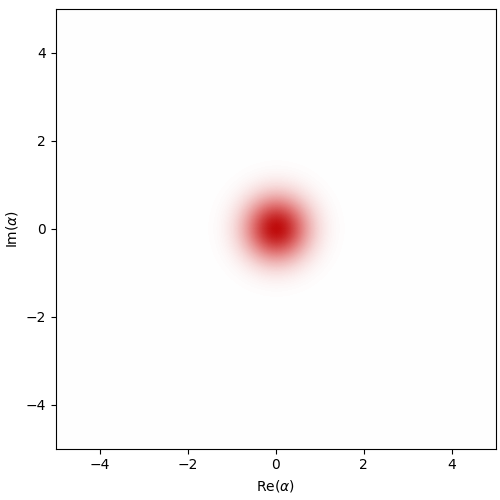

In [22]:
# Plot Wigner function of mode a
dq.plot.wigner_gif(res.states, gif_duration = 2, fps=24)